### Summary

Because we had to reject our hypothesis (a restaurant's health score has impact on a Yelp review), we considered other paths of inquiry. One path that we skimmed was to review Yelp reviews according to price point. We visualized this via histograms so we could see how the scores distributed within each of Yelp's price points ($, $$, $$$, $$$$). We observed enough distortion that we think it would be interesting to pusue this further in another project.

In [2]:
#import necessary dependencies
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

In [3]:
#import the scrubbed restaurant data
restaurants_raw = pd.read_csv('clean_data_all_restaurants.csv')
restaurants_raw.head()

,Unnamed: 0,Inspection Date,Address,City,Facility ID,Restaurant,State,Zip,Cuisine,Grade,Active Business,Latitude,Longitude,Type,Price,Rating,Inspection ID,# of Reviews,Score,Yelp ID
0,13750,03/30/2018 12:00:00 AM,1972 HILLHURST AVE,LOS ANGELES,FA0258145,SUSHI AI,CA,90027,"['Sushi Bars', 'Japanese']",A,False,34.107347,-118.287275,RESTAURANT (31-60) SEATS HIGH RISK,$$,4.5,PR0208131,36,90,J5OiWmshzD9Xf4NusZvhjA
1,13792,03/29/2018 12:00:00 AM,5611 FIGUEROA ST STE 211,LOS ANGELES,FA0258144,HOMESTATE,CA,90042,"['Tex-Mex', 'Tacos', 'Breakfast & Brunch']",A,False,34.109420,-118.193830,RESTAURANT (31-60) SEATS HIGH RISK,$$,4.0,PR0208130,91,96,iBN17PY_Bd7uW8qWgjv-ww
2,13743,03/30/2018 12:00:00 AM,9840 NATIONAL BLVD,LOS ANGELES,FA0258138,K&A CATON CHINESE REST.,CA,90034,['Chinese'],A,False,34.031150,-118.400895,RESTAURANT (31-60) SEATS HIGH RISK,$,3.0,PR0208124,143,90,D9R0ynjo-hu7hnLEiWB7fA
3,13720,03/30/2018 12:00:00 AM,929 W JEFFERSON BLVD,LOS ANGELES,FA0258130,KOBUNGA KOREAN GRILL,CA,90089,"['Korean', 'Barbeque']",A,False,34.025032,-118.285650,RESTAURANT (0-30) SEATS HIGH RISK,$$,4.0,PR0208117,50,97,8RXJiao_twvDmzDAqwkw6w
4,13887,03/28/2018 12:00:00 AM,11955 W WASHINGTON BLVD STE 1,LOS ANGELES,FA0257995,WALL STREET PIZZA,CA,90066,['Pizza'],A,False,33.998007,-118.421494,RESTAURANT (0-30) SEATS HIGH RISK,$$,3.0,PR0207952,44,91,aL1wiQCuDn9T-UkvOrmncQ


In [4]:
restaurants_raw['bucket'] = pd.cut(restaurants_raw['Rating'], [0, 2, 3, 4, 5, 6], right=False, labels=['1-1.5', '2-2.5', '3-3.5', '4-4.5', '5'])
restaurants_raw.head()

,Unnamed: 0,Inspection Date,Address,City,Facility ID,Restaurant,State,Zip,Cuisine,Grade,...,Latitude,Longitude,Type,Price,Rating,Inspection ID,# of Reviews,Score,Yelp ID,bucket
0,13750,03/30/2018 12:00:00 AM,1972 HILLHURST AVE,LOS ANGELES,FA0258145,SUSHI AI,CA,90027,"['Sushi Bars', 'Japanese']",A,...,34.107347,-118.287275,RESTAURANT (31-60) SEATS HIGH RISK,$$,4.5,PR0208131,36,90,J5OiWmshzD9Xf4NusZvhjA,4-4.5
1,13792,03/29/2018 12:00:00 AM,5611 FIGUEROA ST STE 211,LOS ANGELES,FA0258144,HOMESTATE,CA,90042,"['Tex-Mex', 'Tacos', 'Breakfast & Brunch']",A,...,34.109420,-118.193830,RESTAURANT (31-60) SEATS HIGH RISK,$$,4.0,PR0208130,91,96,iBN17PY_Bd7uW8qWgjv-ww,4-4.5
2,13743,03/30/2018 12:00:00 AM,9840 NATIONAL BLVD,LOS ANGELES,FA0258138,K&A CATON CHINESE REST.,CA,90034,['Chinese'],A,...,34.031150,-118.400895,RESTAURANT (31-60) SEATS HIGH RISK,$,3.0,PR0208124,143,90,D9R0ynjo-hu7hnLEiWB7fA,3-3.5
3,13720,03/30/2018 12:00:00 AM,929 W JEFFERSON BLVD,LOS ANGELES,FA0258130,KOBUNGA KOREAN GRILL,CA,90089,"['Korean', 'Barbeque']",A,...,34.025032,-118.285650,RESTAURANT (0-30) SEATS HIGH RISK,$$,4.0,PR0208117,50,97,8RXJiao_twvDmzDAqwkw6w,4-4.5
4,13887,03/28/2018 12:00:00 AM,11955 W WASHINGTON BLVD STE 1,LOS ANGELES,FA0257995,WALL STREET PIZZA,CA,90066,['Pizza'],A,...,33.998007,-118.421494,RESTAURANT (0-30) SEATS HIGH RISK,$$,3.0,PR0207952,44,91,aL1wiQCuDn9T-UkvOrmncQ,3-3.5


In [35]:
#build a dataframe of value counts by ratings in order to build a pie
price_counts = restaurants_raw.loc[restaurants_raw['Price'] != 'blank']
prices = pd.DataFrame(price_counts.groupby('Price')['Rating'].value_counts())
prices = prices.unstack()
#prices = prices.columns.get_level_values()
prices
#price_counts.columns = price_counts.columns.get_level_values(1)
#price_counts

Rating                                                             
Rating    1.0    1.5    2.0     2.5     3.0     3.5     4.0     4.5    5.0
Price                                                                     
$        27.0  352.0  819.0  1336.0  1938.0  3250.0  4109.0  2158.0  409.0
$$        6.0  150.0  501.0   930.0  1772.0  4041.0  4970.0  1654.0  146.0
$$$     170.0    NaN    7.0    89.0   400.0   598.0   998.0   218.0    1.0
$$$$      NaN    NaN   35.0    22.0     2.0   144.0   124.0    75.0    3.0

In [46]:
#isolate the $ grade restaurants in their own dataframe
one_scores = pd.DataFrame(prices.loc['$']).reset_index()
one_scores

,level_0,Rating,$
0,Rating,1.0,27.0
1,Rating,1.5,352.0
2,Rating,2.0,819.0
3,Rating,2.5,1336.0
4,Rating,3.0,1938.0
5,Rating,3.5,3250.0
6,Rating,4.0,4109.0
7,Rating,4.5,2158.0
8,Rating,5.0,409.0


Text(0,0.5,'#restaurants')

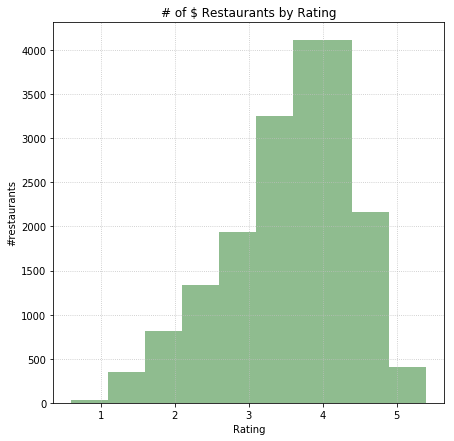

In [48]:
plt.figure(figsize = (7, 7))
plt.bar(one_scores['Rating'], one_scores['$'], color='darkseagreen')
plt.grid(color="0.75", linestyle=":")
plt.title("# of $ Restaurants by Rating")
plt.xlabel("Rating")
plt.ylabel("#restaurants")

#save figure
plt.savefig('$_rating_counts.jpg')

# show plot
plt.show()


In [49]:
#isolate the $$ grade restaurants in their own dataframe
two_scores = pd.DataFrame(prices.loc['$$']).reset_index()
two_scores

,level_0,Rating,$$
0,Rating,1.0,6.0
1,Rating,1.5,150.0
2,Rating,2.0,501.0
3,Rating,2.5,930.0
4,Rating,3.0,1772.0
5,Rating,3.5,4041.0
6,Rating,4.0,4970.0
7,Rating,4.5,1654.0
8,Rating,5.0,146.0


Text(0,0.5,'#restaurants')

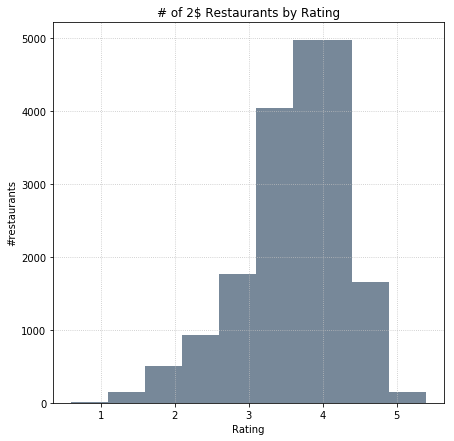

In [55]:
plt.figure(figsize = (7, 7))
plt.bar(two_scores['Rating'], two_scores['$$'], color='lightslategray')
plt.grid(color="0.75", linestyle=":")
plt.title("# of 2$ Restaurants by Rating")
plt.xlabel("Rating")
plt.ylabel("#restaurants")

In [56]:
#isolate the $$$ grade restaurants in their own dataframe
three_scores = pd.DataFrame(prices.loc['$$$']).reset_index()
three_scores

,level_0,Rating,$$$
0,Rating,1.0,170.0
1,Rating,1.5,NaN
2,Rating,2.0,7.0
3,Rating,2.5,89.0
4,Rating,3.0,400.0
5,Rating,3.5,598.0
6,Rating,4.0,998.0
7,Rating,4.5,218.0
8,Rating,5.0,1.0


Text(0,0.5,'#restaurants')

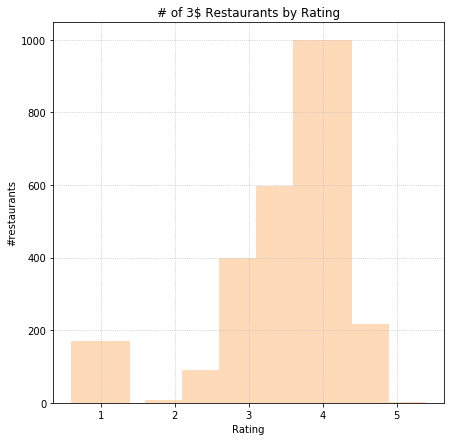

In [57]:
plt.figure(figsize = (7, 7))
plt.bar(three_scores['Rating'], three_scores['$$$'], color='peachpuff')
plt.grid(color="0.75", linestyle=":")
plt.title("# of 3$ Restaurants by Rating")
plt.xlabel("Rating")
plt.ylabel("#restaurants")

In [61]:
#isolate the $$$$ grade restaurants in their own dataframe
four_scores = pd.DataFrame(prices.loc['$$$$']).reset_index()
four_scores

,level_0,Rating,$$$$
0,Rating,1.0,NaN
1,Rating,1.5,NaN
2,Rating,2.0,35.0
3,Rating,2.5,22.0
4,Rating,3.0,2.0
5,Rating,3.5,144.0
6,Rating,4.0,124.0
7,Rating,4.5,75.0
8,Rating,5.0,3.0


Text(0,0.5,'#restaurants')

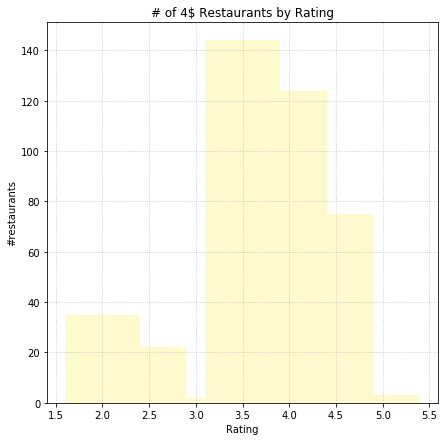

In [64]:
plt.figure(figsize = (7, 7))
plt.bar(four_scores['Rating'], four_scores['$$$$'], color='lemonchiffon')
plt.grid(color="0.75", linestyle=":")
plt.title("# of 4$ Restaurants by Rating")
plt.xlabel("Rating")
plt.ylabel("#restaurants")